In [234]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import scipy as sp
import os
import xgboost as xgb
%matplotlib inline

Let's load the data into pandas dataframes

In [235]:
train = pd.read_csv("./train.csv", parse_dates = ['timestamp'])
print train.shape
test = pd.read_csv("./test.csv", parse_dates = ['timestamp'])
print test.shape
macro = pd.read_csv("./macro.csv", parse_dates = ['timestamp'])
print macro.shape
train.head()

(30471, 292)
(7662, 291)
(2484, 100)


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

In [236]:
macro.head()

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,eurrub,brent,net_capital_export,gdp_annual,gdp_annual_growth,average_provision_of_build_contract,average_provision_of_build_contract_moscow,rts,micex,micex_rgbi_tr,micex_cbi_tr,deposits_value,deposits_growth,deposits_rate,mortgage_value,mortgage_growth,mortgage_rate,grp,grp_growth,income_per_cap,real_dispos_income_per_cap_growth,salary,salary_growth,fixed_basket,retail_trade_turnover,retail_trade_turnover_per_cap,retail_trade_turnover_growth,labor_force,unemployment,employment,invest_fixed_capital_per_cap,invest_fixed_assets,profitable_enterpr_share,unprofitable_enterpr_share,share_own_revenues,overdue_wages_per_cap,fin_res_per_cap,marriages_per_1000_cap,divorce_rate,construction_value,invest_fixed_assets_phys,pop_natural_increase,pop_migration,pop_total_inc,childbirth,mortality,housing_fund_sqm,lodging_sqm_per_cap,water_pipes_share,baths_share,sewerage_share,gas_share,hot_water_share,electric_stove_share,heating_share,old_house_share,average_life_exp,infant_mortarity_per_1000_cap,perinatal_mort_per_1000_cap,incidence_population,rent_price_4+room_bus,rent_price_3room_bus,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,load_of_teachers_preschool_per_teacher,child_on_acc_pre_school,load_of_teachers_school_per_teacher,students_state_oneshift,modern_education_share,old_education_build_share,provision_doctors,provision_nurse,load_on_doctors,power_clinics,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,provision_retail_space_sqm,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,2010-01-01,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38807.2,-0.078209,5.0,NaN,NaN,NaN,NaN,NaN,7484970,NaN,NaN,142968,NaN,13.72,8375.8638,NaN,30789.2,0.038,38410.5,NaN,11443.63,2882.4169,251.484,106.8,6436.244,0.018,0.69,63932.0,732.760604,0.716,0.284,0.962915,12865.0,233.351529,8.0,3.9,553874.9,95.8,-0.3,14.1,13.8,10.7,11.0,216.0,18.715883,99.9,99.8,99.6,44.4,95.7,55.0,99.9,0.3,74.2,6.1,5.87,696.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,721.477765,"45,713",1356.112607,NaN,NaN,NaN,18.0,99.4,7872.848285,162.9,NaN,NaN,NaN,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
1,2010-01-02,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38807.2,-0.078209,5.0,NaN,NaN,NaN,NaN,175.15,7484970,NaN,NaN,142968,NaN,13.72,8375.8638,NaN,30789.2,0.038,38410.5,NaN,11443.63,2882.4169,251.484,106.8,6436.244,0.018,0.69,63932.0,732.760604,0.716,0.284,0.962915,12865.0,233.351529,8.0,3.9,553874.9,95.8,-0.3,14.1,13.8,10.7,11.0,216.0,18.715883,99.9,99.8,99.6,44.4,95.7,55.0,99.9,0.3,74.2,6.1,5.87,696.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,721.477765,"45,713",1356.112607,NaN,NaN,NaN,18.0,99.4,7872.848285,162.9,NaN,NaN,NaN,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
2,2010-01-03,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38807.2,-0.078209,5.0,NaN,NaN,NaN,NaN,178.66,7484970,NaN,NaN,142968,NaN,13.72,8375.8638,NaN,30789.2,0.038,38410.5,NaN,11443.63,2882.4169,251.484,106.8,6436.244,0.018,0.69,63932.0,732.760604,0.716,0.284,0.962915,12865.0,233.351529,8.0,3.9,553874.9,95.8,-0.3,14.1,13.8,10.7,11.0,216.0,18.715883,99.9,99.8,99.6,44.4,95.7,55.0,99.9,0.3,74.2,6.1,5.87,696.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,721.477765,"45,713",1356.112607,NaN,NaN,NaN,18.0,99.4,7872.848285,162.9,NaN,NaN,NaN,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
3,2010-01-04,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.905,43.4054,80.12,NaN,38807.2,-0.078209,5.0,NaN,NaN,NaN,NaN,183.44,7484970,NaN,NaN,142968,NaN,13.72,8375.8638,NaN,30789.2,0.038,38410.5,NaN,11443.63,2882.4169,251.484,106.8,6436.244,0.018,0.69,63932.0,732.760604,0.716,0.284,0.962915,12865.0,233.351529,8.0,3.9,553874.9,95.8,-0.3,14.1,13.8,10.7,11.0,216.0,18.715883,99.

In [237]:
hftrain = train.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,291]]

In [238]:
hftrain.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Bibirevo,6.407578e+06,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Nagatinskij Zaton,9.589337e+06,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Tekstil'shhiki,4.808270e+06,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Mitino,1.258354e+07,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Basmannoe,8.398461e+06,16331452


In [239]:
hftest = test.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13]]

In [240]:
hftest.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m
0,30474,2015-07-01,39.0,20.7,2,9,1,1998.0,1,8.9,3.0,Investment,Juzhnoe Butovo,2.615514e+07
1,30475,2015-07-01,79.2,NaN,8,17,1,0.0,3,1.0,1.0,OwnerOccupier,Poselenie Vnukovskoe,2.553630e+07
2,30476,2015-07-01,40.5,25.1,3,5,2,1960.0,2,4.8,2.0,Investment,Perovo,9.946335e+06
3,30477,2015-07-01,62.8,36.0,17,17,1,2016.0,2,62.8,3.0,OwnerOccupier,Poselenie Voskresenskoe,2.149409e+07
4,30478,2015-07-01,40.0,40.0,17,17,1,0.0,1,1.0,1.0,OwnerOccupier,Poselenie Vnukovskoe,2.553630e+07


In [241]:
house_test.values

array([[30474, Timestamp('2015-07-01 00:00:00'), 39.0, ..., 'Investment',
        'Juzhnoe Butovo', 26155137.04],
       [30475, Timestamp('2015-07-01 00:00:00'), 79.2, ...,
        'OwnerOccupier', 'Poselenie Vnukovskoe', 25536296.81],
       [30476, Timestamp('2015-07-01 00:00:00'), 40.5, ..., 'Investment',
        'Perovo', 9946335.108],
       ..., 
       [38133, Timestamp('2016-05-30 00:00:00'), 41.08, ...,
        'OwnerOccupier', 'Tverskoe', 7307410.574],
       [38134, Timestamp('2016-05-30 00:00:00'), 34.8, ..., 'Investment',
        'Orehovo-Borisovo Juzhnoe', 7128794.3379999995],
       [38135, Timestamp('2016-05-30 00:00:00'), 63.0, ..., 'Investment',
        'Chertanovo Severnoe', 6206098.885]], dtype=object)

In [242]:
hftest.shape

(7662, 14)

In [243]:
hftrain.describe()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,price_doc
count,30471.000000,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,3.047100e+04,3.047100e+04
mean,15237.917397,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,1.765705e+07,7.123035e+06
std,8796.501536,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,2.064961e+07,4.780111e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,2.081628e+06,1.000000e+05
25%,7620.500000,38.000000,20.000000,3.000000,9.000000,1.000000,1.967000e+03,1.000000,1.000000,1.000000,7.307411e+06,4.740002e+06
50%,15238.000000,49.000000,30.000000,6.500000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,1.050803e+07,6.274411e+06
75%,22855.500000,63.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000,1.803644e+07,8.300000e+06
max,30473.000000,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,2.060718e+08,1.111111e+08


In [244]:
# check number of missing values per column
np.sum(hftrain.isnull())

id                  0
timestamp           0
full_sq             0
life_sq          6383
floor             167
max_floor        9572
material         9572
build_year      13605
num_room         9572
kitch_sq         9572
state           13559
product_type        0
sub_area            0
area_m              0
price_doc           0
dtype: int64

Oof. Okay, let's take care of these as we go along. First, look at price.

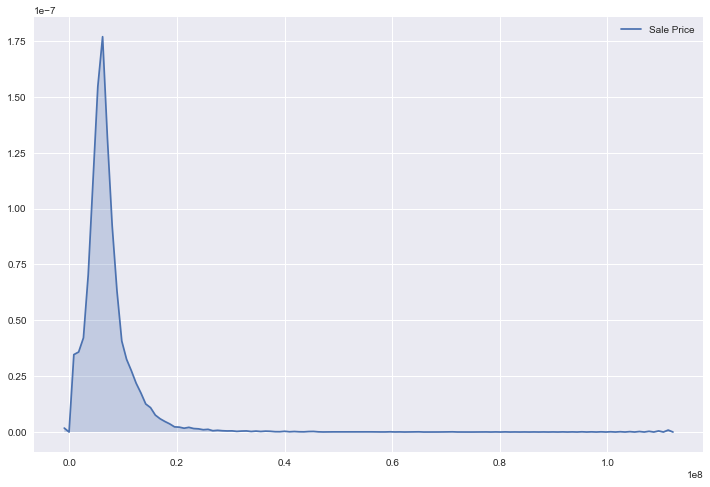

In [245]:
plt.figure(figsize=(12,8))
sns.kdeplot(hftrain['price_doc'], shade=True, label='Sale Price')

Skewed way right. Let's log this to normalize.

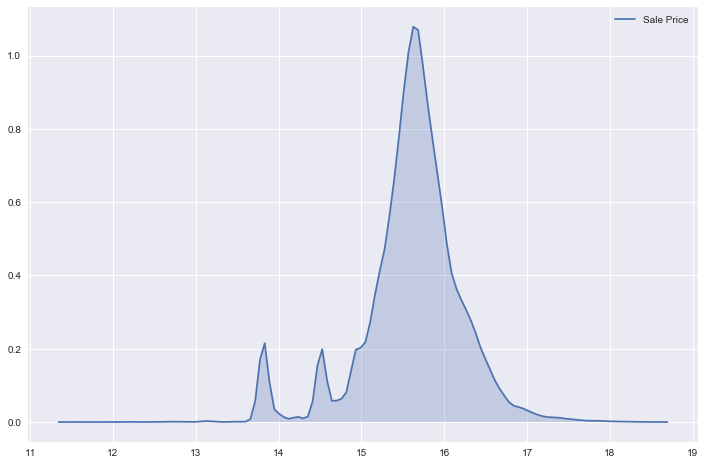

In [246]:
plt.figure(figsize=(12,8))
sns.kdeplot(np.log(hftrain['price_doc']), shade=True, label='Sale Price')

Looks better. Forget about dates for now, let's do a correlation plot...maybe we can join some interesting variables from the macro dataset as well?

Look at dates first. are they unique?

In [247]:
hftrain.groupby("timestamp").agg(['count'])[[1]]

,full_sq
,count
timestamp,
2011-08-20,1
2011-08-23,1
2011-08-27,1
2011-09-01,1
2011-09-05,1
2011-09-06,1
2011-09-08,1
2011-09-09,1


Okay. Let's look at macros dataset, specifically gdp_quart (GDP), deposits_value (Volume of household deposits), deposits_growth (Volume growth of population's deposits), deposits_rate (Average interest rate on deposits), mortgage_value (Volume of mortgage loans), mortgage_growth (Growth of mortgage lending), mortgage_rate (Weighted average rate of mortgage loans), salary, unemployment (Unemployment rate), and employment (Employment rate).

In [248]:
macro_set = macro.loc[:,['timestamp', 'gdp_quart', 'deposits_value', 'deposits_growth', 'deposits_rate', 'mortgage_value', 
             'mortgage_growth', 'mortgage_rate', 'salary', 'unemployment', 'employment']]

In [249]:
macro_set.head(10)

,timestamp,gdp_quart,deposits_value,deposits_growth,deposits_rate,mortgage_value,mortgage_growth,mortgage_rate,salary,unemployment,employment
0,2010-01-01,NaN,7484970,NaN,NaN,142968,NaN,13.72,38410.5,0.018,0.69
1,2010-01-02,NaN,7484970,NaN,NaN,142968,NaN,13.72,38410.5,0.018,0.69
2,2010-01-03,NaN,7484970,NaN,NaN,142968,NaN,13.72,38410.5,0.018,0.69
3,2010-01-04,NaN,7484970,NaN,NaN,142968,NaN,13.72,38410.5,0.018,0.69
4,2010-01-05,NaN,7484970,NaN,NaN,142968,NaN,13.72,38410.5,0.018,0.69
5,2010-01-06,NaN,7484970,NaN,NaN,142968,NaN,13.72,38410.5,0.018,0.69
6,2010-01-07,NaN,7484970,NaN,NaN,142968,NaN,13.72,38410.5,0.018,0.69
7,2010-01-08,NaN,7484970,NaN,NaN,142968,NaN,13.72,38410.5,0.018,0.69
8,2010-01-09,NaN,7484970,NaN,NaN,142968,NaN,13.72,38410.5,0.018,0.69
9,2010-01-10,NaN,7484970,NaN,NaN,142968,NaN,13.72,38410.5,0.018,0.69


In [250]:
macro_set.shape

(2484, 11)

Check for duplicates

In [251]:
np.sum(macro_set.isnull())

timestamp            0
gdp_quart           90
deposits_value       0
deposits_growth     31
deposits_rate      414
mortgage_value       0
mortgage_growth    365
mortgage_rate        0
salary             293
unemployment       293
employment         293
dtype: int64

See if the timestamps are duplicated.

In [252]:
macro_set[macro_set.duplicated(['timestamp'], keep=False)]

,timestamp,gdp_quart,deposits_value,deposits_growth,deposits_rate,mortgage_value,mortgage_growth,mortgage_rate,salary,unemployment,employment


Negative. Okay, now join with house_train.

In [253]:
train_full = pd.merge(hftrain, macro_set, how = 'left', on = 'timestamp')

In [254]:
test_full = pd.merge(hftest, macro_set, how = 'left', on = 'timestamp')

In [255]:
train_full.shape

(30471, 25)

In [256]:
test_full.shape

(7662, 24)

In [257]:
pd.set_option('display.max_columns', None)

In [258]:
hftrain.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Bibirevo,6.407578e+06,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Nagatinskij Zaton,9.589337e+06,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Tekstil'shhiki,4.808270e+06,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Mitino,1.258354e+07,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Basmannoe,8.398461e+06,16331452


Let's look only at hftrain first. Forget about the rest.

In [259]:
np.sum(hftrain.isnull())

id                  0
timestamp           0
full_sq             0
life_sq          6383
floor             167
max_floor        9572
material         9572
build_year      13605
num_room         9572
kitch_sq         9572
state           13559
product_type        0
sub_area            0
area_m              0
price_doc           0
dtype: int64

In [260]:
corrmat = hftrain.corr()
corrmat

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,price_doc
id,1.000000,0.021447,0.014478,-0.022523,0.007037,0.008507,-0.012726,0.014387,-0.010414,-0.119621,0.063572,0.121203
full_sq,0.021447,1.000000,0.161112,0.089649,0.119225,0.032866,-0.006041,0.695444,0.020026,-0.091348,0.056303,0.341840
life_sq,0.014478,0.161112,1.000000,0.045090,0.042442,0.011393,-0.002401,0.191024,0.000633,-0.066633,0.061395,0.165606
floor,-0.022523,0.089649,0.045090,1.000000,0.454488,-0.009043,0.001192,-0.005657,-0.008457,-0.113906,-0.019448,0.117447
max_floor,0.007037,0.119225,0.042442,0.454488,1.000000,0.045915,-0.000261,-0.014220,0.020345,-0.072161,-0.092954,0.094386
material,0.008507,0.032866,0.011393,-0.009043,0.045915,1.000000,-0.004402,-0.026924,0.038747,-0.034225,0.001182,0.064047
build_year,-0.012726,-0.006041,-0.002401,0.001192,-0.000261,-0.004402,1.000000,-0.008251,0.000596,0.295053,-0.004572,0.002161
num_room,0.014387,0.695444,0.191024,-0.005657,-0.014220,-0.026924,-0.008251,1.000000,0.016950,0.082027,-0.040841,0.476337
kitch_sq,-0.010414,0.020026,0.000633,-0.008457,0.020345,0.038747,0.000596,0.016950,1.000000,0.048695,-0.023425,0.028718
state,-0.119621,-0.091348,-0.066633,-0.113906,-0.072161,-0.034225,0.295053,0.082027,0.048695,1.000000,-0.295207,0.121303


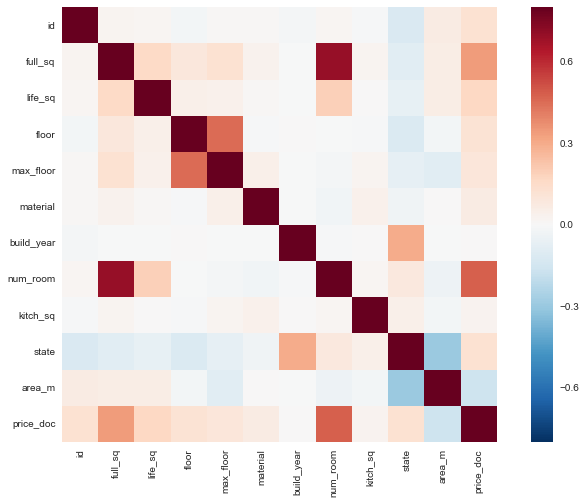

In [261]:
plt.figure(figsize=(12,8))
sns.heatmap(corrmat, vmax=.8, square=True)

In [262]:
# Do stuff with the date
def add_date_features(df):
    '''(DataFrame) -> DataFrame
    
    Will add some specific columns based on the date
    of the sale.
    '''
    #Convert to datetime to make extraction easier
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    #Extract features
    df['month'] = df['timestamp'].dt.month
    df['day'] = df['timestamp'].dt.day
    df['year'] = df['timestamp'].dt.year
    
    #These features inspired by Bruno's Notebook at https://www.kaggle.com/bguberfain/naive-xgb-lb-0-317
    #Week-Year
    week_year = df['timestamp'].dt.weekofyear + df['timestamp'].dt.year * 100
    week_year_map = week_year.value_counts().to_dict()
    df['week_year'] = week_year.map(week_year_map)
    #df.drop('timestamp', axis=1, inplace=True)
    return df

In [263]:
hftrain = add_date_features(hftrain)

/Users/andrewrubino/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/andrewrubino/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/andrewrubino/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata

In [264]:
train_df.apply(lambda x: type(x[0]))

NameError: name 'train_df' is not defined

In [265]:
hftrain.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,price_doc,month,day,year,week_year
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Bibirevo,6.407578e+06,5850000,8,20,2011,1
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Nagatinskij Zaton,9.589337e+06,6000000,8,23,2011,2
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Tekstil'shhiki,4.808270e+06,5700000,8,27,2011,2
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Mitino,1.258354e+07,13100000,9,1,2011,1
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Basmannoe,8.398461e+06,16331452,9,5,2011,5


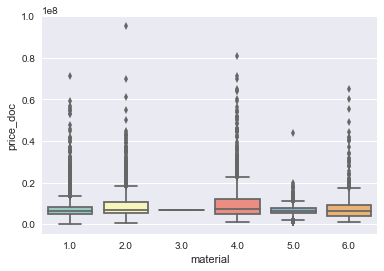

In [266]:
sns.boxplot(x='material', 
            y='price_doc', 
            data=hftrain, 
            palette='Set3')

In [267]:
print(hftrain['material'].value_counts(dropna=False))
print(hftest['material'].value_counts(dropna=False))

 1.0    14197
NaN      9572
 2.0     2993
 5.0     1561
 4.0     1344
 6.0      803
 3.0        1
Name: material, dtype: int64
1    5241
2     958
4     619
5     487
6     356
3       1
Name: material, dtype: int64


Nothing missing in the test, so let's look into how to deal with NAs in training.

In [268]:
hftrain.loc[hftrain['material'] == 3]
hftest.loc[hftest['material'] == 3]

# 3's seem to be negligible, let's replace them with 0
hftrain.loc[train['material'] == 3, 'material'] = np.nan
hftest.loc[test['material'] == 3, 'material'] = np.nan

In [269]:
# Turn that into a function
def clean_materials(df):
    df.loc[df['material'] ==3, 'material'] = np.nan
    return df

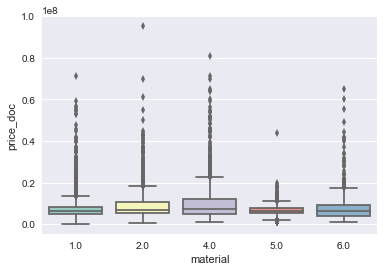

In [270]:
sns.boxplot(x='material', 
            y='price_doc', 
            data=hftrain, 
            palette='Set3')

Let's look at state

In [271]:
print(hftrain['state'].value_counts(dropna=False))
print(hftest['state'].value_counts(dropna=False))

NaN      13559
 2.0      5844
 3.0      5790
 1.0      4855
 4.0       422
 33.0        1
Name: state, dtype: int64
 2.0    2662
 1.0    2266
 3.0    1913
NaN      694
 4.0     127
Name: state, dtype: int64


In [272]:
# What's up with that 33 in training? Maybe they meant 3. We;ll change that.
hftrain.loc[hftrain['state'] == 33, 'state'] = 3

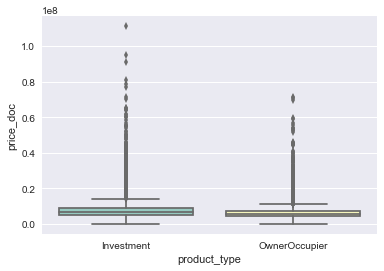

In [273]:
# Let's look at product type
sns.boxplot(x='product_type', 
            y='price_doc', 
            data=hftrain, 
            palette='Set3')

In [274]:
# check missingness
print(hftrain['product_type'].value_counts(dropna=False))
print(hftest['product_type'].value_counts(dropna=False))
# looks okay for the most part

Investment       19448
OwnerOccupier    11023
Name: product_type, dtype: int64
Investment       4998
OwnerOccupier    2631
NaN                33
Name: product_type, dtype: int64


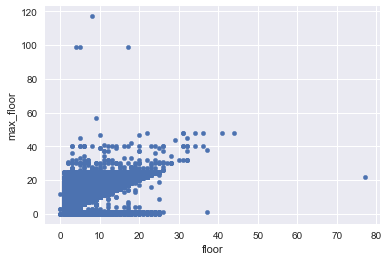

In [275]:
## floor / max_floor
hftrain.plot.scatter(x='floor', y='max_floor')

By definition, floor (which the apartment is on) cannot be higher than the max floor of the building. We're seeing a whole lot of points on the bottom there with max_floor equal to zero, and some crazy big outliers which we might want to take a look at.

In [276]:
# First the outliers. Which building have greater than 60 floors?
## max_floor
hftrain.loc[hftrain['max_floor'] > 60]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,price_doc,month,day,year,week_year
20722,20725,2014-07-10,47,47.0,4.0,99.0,2.0,NaN,1.0,1.0,NaN,OwnerOccupier,Pokrovskoe Streshnevo,1.308980e+07,10238400,7,10,2014,202
21734,21737,2014-08-21,71,71.0,5.0,99.0,6.0,NaN,2.0,9.0,NaN,OwnerOccupier,Poselenie Moskovskij,4.036700e+07,8484365,8,21,2014,251
21852,21855,2014-08-25,46,46.0,17.0,99.0,6.0,NaN,3.0,9.0,NaN,OwnerOccupier,Poselenie Sosenskoe,6.677245e+07,6670000,8,25,2014,207
25940,25943,2014-12-06,63,63.0,8.0,117.0,1.0,NaN,2.0,1.0,1.0,OwnerOccupier,Tverskoe,7.307411e+06,7239838,12,6,2014,424


We can't really make any inferences on the max_floors of 99, but the 117 is probably an error. We'll change that to 17, and make the other ones NaN.

In [277]:
hftrain.loc[hftrain['max_floor'] == 117, 'max_floor'] = 17
hftrain.loc[hftrain['max_floor'] > 60, 'max_floor'] = np.nan

In [278]:
# Investigate floors greater than 60
hftrain.loc[hftrain['floor'] > 60]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,price_doc,month,day,year,week_year
23584,23587,2014-10-15,57,33.0,77.0,22.0,1.0,1986.0,2.0,10.0,3.0,Investment,Lomonosovskoe,3326418.741,13700000,10,15,2014,232


In [279]:
# Seems like an error. Change it to 7.

In [280]:
hftrain.loc[hftrain['floor'] == 77, 'floor'] = 7

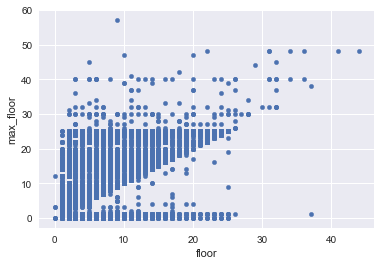

In [281]:
hftrain.plot.scatter(x='floor', y='max_floor')

In [282]:
# Looks better, might still want to do something about that bottom portion.

In [283]:
# Build year
hftrain['build_year'].value_counts(dropna=False).sort_index()
hftest['build_year'].value_counts(dropna=False).sort_index()
# note: there are some build years in 2017-2019 in test set. Might not be by accident

 0.0        369
 1.0        187
 2.0          1
 215.0        1
 1875.0       1
 1890.0       2
 1895.0       1
 1898.0       1
 1902.0       1
 1905.0       1
 1906.0       1
 1908.0       1
 1910.0       1
 1911.0       3
 1912.0       1
 1914.0       2
 1917.0       3
 1924.0       1
 1926.0       8
 1927.0       3
 1928.0       6
 1929.0       4
 1930.0       3
 1931.0       3
 1932.0       3
 1933.0       1
 1935.0       1
 1937.0       5
 1938.0       3
 1939.0       3
           ... 
 1991.0      28
 1992.0      56
 1993.0      39
 1994.0      49
 1995.0      40
 1996.0      44
 1997.0      58
 1998.0      46
 1999.0      53
 2000.0      56
 2001.0      63
 2002.0      65
 2003.0      61
 2004.0      66
 2005.0      65
 2006.0      92
 2007.0      46
 2008.0      74
 2009.0      58
 2010.0      47
 2011.0      61
 2012.0      74
 2013.0     260
 2014.0     199
 2015.0     259
 2016.0     400
 2017.0     413
 2018.0      30
 2019.0       5
NaN        1049
Name: build_year, dtype:

In [284]:
# 20052009 is weird. Make that 2007. Anything less than year 215 is weird too. maybe we can make those the median...
# or missing like Shu did
hftrain.loc[hftrain['build_year'] == 20052009, 'build_year'] = 2007
hftrain.loc[hftrain['build_year'] == 4965, 'build_year'] = np.nan
hftrain.loc[hftrain['build_year'] < 1800, 'build_year'] = np.nan
hftest.loc[hftest['build_year'] < 1800, 'build_year'] = np.nan

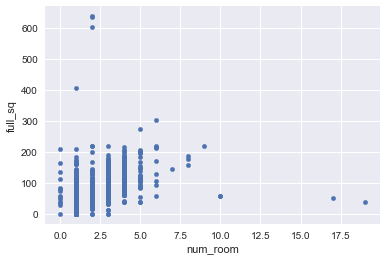

In [285]:
# Number of rooms vs full_sq
hftrain.plot.scatter(x='num_room', y='full_sq')

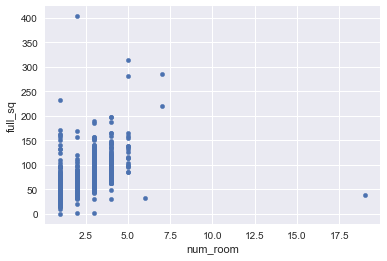

In [286]:
# Number of rooms vs full_sq
hftest.plot.scatter(x='num_room', y='full_sq')

In [287]:
# Sup with 15 rooms and above?
hftrain.loc[hftrain['num_room'] > 15]
# Let's make them go bye-bye

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,price_doc,month,day,year,week_year
11621,11624,2013-10-28,40,19.0,17.0,17.0,1.0,2011.0,19.0,7.0,3.0,Investment,Poselenie Vnukovskoe,2.553630e+07,2630000,10,28,2013,188
26713,26716,2014-12-18,51,30.0,14.0,17.0,1.0,1984.0,17.0,8.0,3.0,Investment,Obruchevskoe,6.050065e+06,13150000,12,18,2014,627


In [288]:
hftrain.loc[hftrain['num_room'] > 15, 'num_room'] = np.nan
hftest.loc[hftest['num_room'] > 15, 'num_room'] = np.nan

In [289]:
# Let's create a new variable called building age. 2017 - build_year
hftrain['building_age'] = 2017 - hftrain['build_year']
hftest['building_age'] = 2017 - hftest['build_year']

/Users/andrewrubino/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/andrewrubino/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [290]:
hftrain.loc[hftrain['building_age'] < 0, 'building_age'] = np.nan

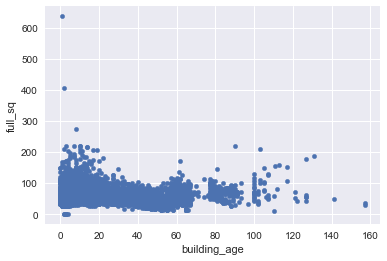

In [291]:
# How bout we see building age versus square footage
hftrain.plot.scatter(x='building_age', y='full_sq')
# no relationship it seems

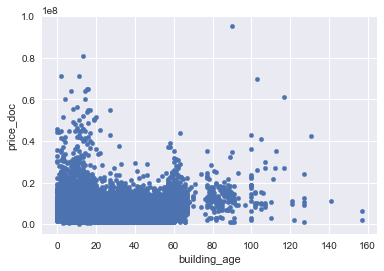

In [292]:
# how bout building age with price?
hftrain.plot.scatter(x='building_age', y='price_doc')
# slightly bimodal. newer buildings are more expensive.

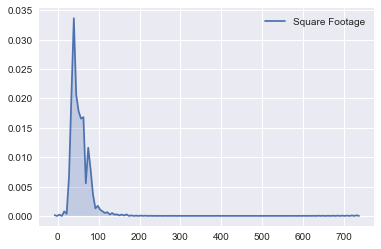

In [299]:
# Let's look at full_sq
sns.kdeplot(hftrain['full_sq'], shade=True, label='Square Footage')

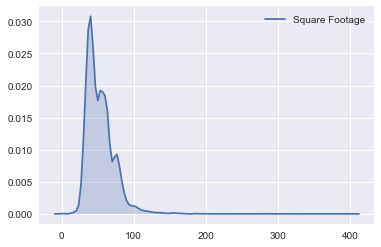

In [301]:
sns.kdeplot(hftest['full_sq'], shade=True, label='Square Footage')

In [298]:
hftrain.loc[hftrain['full_sq'] > 1000] # remove this

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,price_doc,month,day,year,week_year,building_age


In [302]:
hftest.loc[hftest['full_sq'] > 500] # remove this

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,building_age


In [297]:
hftrain.loc[hftrain['full_sq'] > 1000, 'full_sq'] = np.nan

/Users/andrewrubino/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


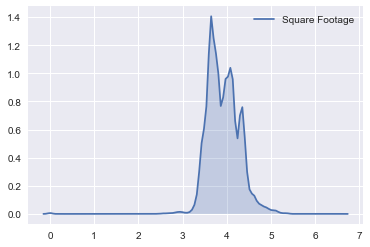

In [303]:
# Maybe we can logify that full_sq
sns.kdeplot(np.log(hftrain['full_sq']), shade=True, label='Square Footage')

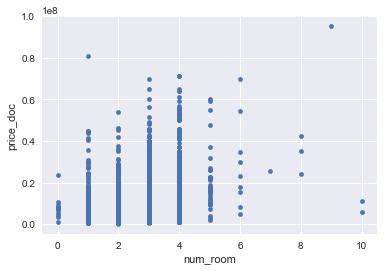

In [304]:
# How about number of rooms vs price?
hftrain.plot.scatter(x='num_room', y='price_doc')

In [305]:
# Add year-month and plot over time
hftrain["yearmonth"] = hftrain["timestamp"].dt.year*100 + hftrain["timestamp"].dt.month
hftest["yearmonth"] = hftest["timestamp"].dt.year*100 + hftest["timestamp"].dt.month

/Users/andrewrubino/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/andrewrubino/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [306]:
Plot price over time

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,price_doc,month,day,year,week_year,building_age,yearmonth
0,1,2011-08-20,43.0,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Bibirevo,6.407578e+06,5850000,8,20,2011,1,NaN,201108
1,2,2011-08-23,34.0,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Nagatinskij Zaton,9.589337e+06,6000000,8,23,2011,2,NaN,201108
2,3,2011-08-27,43.0,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Tekstil'shhiki,4.808270e+06,5700000,8,27,2011,2,NaN,201108
3,4,2011-09-01,89.0,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Mitino,1.258354e+07,13100000,9,1,2011,1,NaN,201109
4,5,2011-09-05,77.0,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Basmannoe,8.398461e+06,16331452,9,5,2011,5,NaN,201109


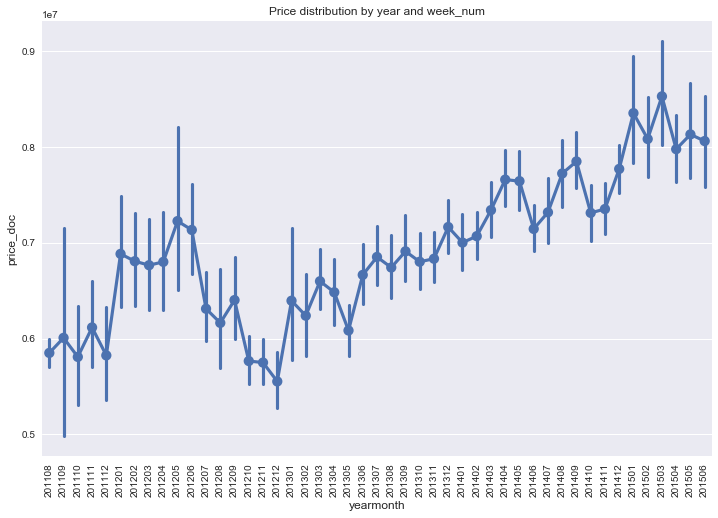

In [307]:
plt.figure(figsize=(12,8))
sns.pointplot(x='yearmonth', y='price_doc', data=hftrain)
plt.ylabel('price_doc', fontsize=12)
plt.xlabel('yearmonth', fontsize=12)
plt.title('Price distribution by year and week_num')
plt.xticks(rotation='vertical')
plt.show()
# We can see in macro that price drops significantly after.

In [308]:
# Let's investigate subarea. How many values of each?
hftrain['sub_area'].value_counts(dropna=False).sort_index()

Ajeroport                 123
Akademicheskoe            211
Alekseevskoe              100
Altuf'evskoe               68
Arbat                      15
Babushkinskoe             123
Basmannoe                  98
Begovoe                    60
Beskudnikovskoe           166
Bibirevo                  230
Birjulevo Vostochnoe      268
Birjulevo Zapadnoe        115
Bogorodskoe               305
Brateevo                  182
Butyrskoe                 101
Caricyno                  220
Cheremushki               158
Chertanovo Central'noe    196
Chertanovo Juzhnoe        273
Chertanovo Severnoe       200
Danilovskoe               199
Dmitrovskoe               174
Donskoe                   135
Dorogomilovo               56
Filevskij Park            148
Fili Davydkovo            137
Gagarinskoe                79
Gol'janovo                295
Golovinskoe               224
Hamovniki                  90
                         ... 
Severnoe Izmajlovo        163
Severnoe Medvedkovo       167
Severnoe T

In [313]:
sub_area_group = hftrain.groupby(['sub_area']).price_doc.agg(['count', 'sum', 'min', 'max', 'mean', 'std', 'median'])

In [314]:
sub_area_group

,count,sum,min,max,mean,std,median
sub_area,,,,,,,
Ajeroport,123,1216340857,1000000,71249624,9888950,7.208687e+06,8400000
Akademicheskoe,211,2231484603,990000,51600000,10575756,7.083470e+06,9000000
Alekseevskoe,100,897879560,500000,34645000,8978795,5.775619e+06,7500000
Altuf'evskoe,68,375101715,990000,14900000,5516201,2.974730e+06,5950000
Arbat,15,236922000,4950000,61072000,15794800,1.376067e+07,12000000
Babushkinskoe,123,939429933,990000,24020870,7637641,3.997682e+06,6950000
Basmannoe,98,1135596478,990000,45000000,11587719,7.224901e+06,10450000
Begovoe,60,637416519,1000000,33750000,10623608,5.429234e+06,9600000
Beskudnikovskoe,166,1123913742,190000,17500000,6770564,3.633550e+06,6450000


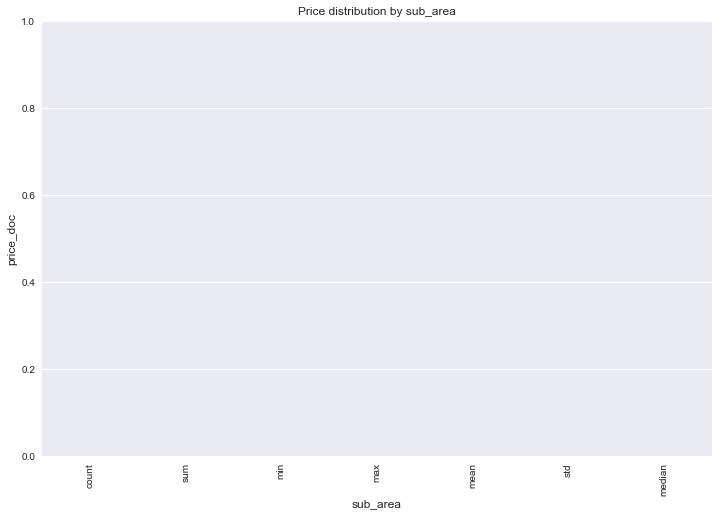

In [317]:
plt.figure(figsize=(12,8))
sns.boxplot(x='sub_area', y='price_doc', data=hftrain, order = sub_area_group)
plt.ylabel('price_doc', fontsize=12)
plt.xlabel('sub_area', fontsize=12)
plt.title('Price distribution by sub_area')
plt.xticks(rotation='vertical')
plt.show()


